In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
import numpy as np
from scipy.stats import rankdata

In [17]:
precision_df = pd.read_csv("../../results/precision_recall_results_against_collectri.csv")
precision_df = precision_df.replace({"all" : "GRNBoost2", "signif" : "SignifiKANTE (BH)"})

sim_precisions = pd.read_csv("../../results/sc_simulated_data/aggregated_metrics.tsv", sep='\t', index_col=0)
sim_precisions = sim_precisions[sim_precisions['data_configuration']=='5_sources']
sim_precisions.replace({'unfiltered' : 'GRNBoost2', r"$\alpha$=0.05" : "SignifiKANTE", r"$\alpha$=0.05 (BH-adj)" : "SignifiKANTE (BH)"}, inplace=True)

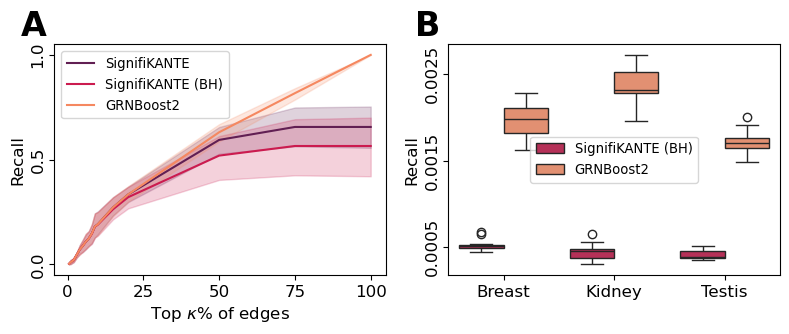

In [39]:
fig, axs = plt.subplot_mosaic([['A', 'B']])
fig.set_size_inches(8, 3.5)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
axs_list = list(axs.values())
label_fontsize = 12

# Set common colorbar for matching subplots.
all_types = ['SignifiKANTE', 'SignifiKANTE (BH)', 'GRNBoost2']
common_palette = sns.color_palette("rocket", len(all_types))
palette_dict = dict(zip(all_types, common_palette))

### Precision and Jaccard distance plots.
palette = sns.color_palette("rocket", 3)
line = sns.lineplot(data=sim_precisions, x='thresholds', y='Recall', hue='comparison', palette=palette_dict, ax=axs['A'], hue_order=all_types)
axs['A'].set_xlabel(r"Top $\kappa$% of edges", fontsize=label_fontsize)
axs['A'].set_ylabel(r"Recall", fontsize=label_fontsize)
axs['A'].legend().set_title(None)
for t in line.legend_.texts:
    t.set_fontsize(label_fontsize-2.5)
axs['A'].set_yticks([0.0, 0.5, 1.0])
axs['A'].set_xticks([0, 25, 50, 75, 100])
axs['A'].tick_params(axis='x', labelsize=label_fontsize)
axs['A'].tick_params(axis='y', labelsize=label_fontsize, rotation=90, pad=8)
for label in axs['A'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)   


box = sns.boxplot(data=precision_df, x="tissue", y="recall", hue="type", ax=axs['B'], palette=palette_dict, hue_order=['SignifiKANTE (BH)', 'GRNBoost2'])
box.legend_.set_title(None)
for t in box.legend_.texts:
    t.set_fontsize(label_fontsize-2.5)   
axs['B'].tick_params(axis='x', labelsize=label_fontsize)
axs['B'].set_xlabel("")
axs['B'].set_ylabel("Recall", fontsize=label_fontsize)
axs['B'].set_yticks([0.0005, 0.0015, 0.0025])
axs['B'].tick_params(axis='y', labelrotation=90, labelsize=label_fontsize, pad=8)
axs['B'].tick_params(axis='x', labelsize=label_fontsize)
for label in axs['B'].get_yticklabels():
    label.set_verticalalignment('center')  # move “up” relative to the tick
    label.set_horizontalalignment('center')
    label.set_fontsize(label_fontsize)

#pairs = [
#    (("Breast", "GRNBoost2"), ("Breast", "SignifiKANTE (BH)")),
#    (("Kidney", "GRNBoost2"), ("Kidney", "SignifiKANTE (BH)")),
#    (("Testis", "GRNBoost2"), ("Testis", "SignifiKANTE (BH)"))
#]

#annotator = Annotator(
#    box, pairs,
#    data=precision_df,
#    x="tissue", y="precision", hue="type"
#)

#annotator.configure(
#    test='Wilcoxon',   # or 'Mann-Whitney', 'Wilcoxon', etc.
#    text_format='star',  # can also be 'simple', 'full', or 'pvalue'
#           # place annotations above boxes
#    comparisons_correction=None
#)
#annotator.apply_and_annotate()


labels = {'A': 'A', 'B': 'B'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.1, 1.15, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=24,
        fontweight='bold',
        va='top',
        ha='left'
    )
   
fig.tight_layout()
plt.savefig("supplement_recalls.pdf")
